<p><h2><font color = 'orange'>1.因子分析をやってみる</h2></p>

In [5]:
import pandas as pd
import numpy as np
import os

##ディレクトリ変更
os.chdir('/Users/mac-1803/OneDrive/M1/自主学習')

##データフレームの読み込み
df = pd.read_csv('testfile_1.csv')

In [7]:
##はじめの５行だけデータを確認してみる
df.head(5)

,id,外向性,社交性,積極性,知性,信頼性,素直さ
0,1,3,4,4,5,4,4
1,2,6,6,7,8,7,7
2,3,6,5,7,5,5,6
3,4,6,7,5,4,6,5
4,5,5,7,6,5,5,5


<b>相関係数行列を作る</b>

In [39]:
##dropでデータ削除，axis=1は列方向に
#from sklearn.preprocessing import scale 正規化
cor_data = df.drop('id', axis=1)
#cor_data = pd.DataFrame(scale(cor_data)) 正規化
cor_data.corr()

,外向性,社交性,積極性,知性,信頼性,素直さ
外向性,1.000000,0.486598,0.597427,0.242365,0.276316,0.218862
社交性,0.486598,1.000000,0.557963,0.125065,0.316855,0.172543
積極性,0.597427,0.557963,1.000000,0.240722,0.037339,0.146644
知性,0.242365,0.125065,0.240722,1.000000,0.436256,0.627103
信頼性,0.276316,0.316855,0.037339,0.436256,1.000000,0.583632
素直さ,0.218862,0.172543,0.146644,0.627103,0.583632,1.000000


6因子の固有値はそれぞれ [2.69117566 1.521456   0.71453263 0.48218275 0.25662652 0.33402644]


Text(0, 0.5, 'eigenvalue')

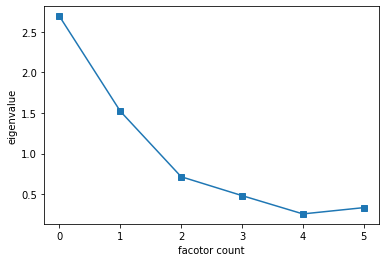

In [24]:
#　 因子数を決定するために，6つの固有値をプロットしてみる
##スクリープロット...固有値を降順でプロットしたグラフ
##因子数を決定する方法の1つ

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.linalg.eigvals(cor_data.corr()), 's-')
print("6因子の固有値はそれぞれ",np.linalg.eigvals(cor_data.corr()))
##np.linalg.eigvalは固有値を求める関数
plt.xlabel('facotor count')
plt.ylabel('eigenvalue')

In [35]:
##python上の因子分析モジュール
from factor_analyzer import FactorAnalyzer

##今回はさっきのグラフから因子数2つにする
fa = FactorAnalyzer(n_factors=2,
                    method = 'ml',
                    ##最尤法にしてみる
                    rotation='promax',
                    #回転方法柔軟性の高いプロマックス回転にしてみる
                    impute='drop')
fa.fit(cor_data)

fa_2 = FactorAnalyzer(n_factors=2,
                    method = 'principal',
                    ##主因子法にしてみる
                    rotation='promax',
                    #回転方法柔軟性の高いプロマックス回転にしてみる
                    impute='drop')
fa_2.fit(cor_data)

fa_3 = FactorAnalyzer(n_factors=2,
                    method = 'ml',
                    ##最尤法にしてみる
                    rotation='varimax',
                    #回転方法柔軟性の高いプロマックス回転にしてみる
                    impute='drop')
fa_3.fit(cor_data)

fa_4 = FactorAnalyzer(n_factors=2,
                    method = 'principal',
                    ##主因子法にしてみる
                    rotation='varimax',
                    #回転方法柔軟性の高いプロマックス回転にしてみる
                    impute='drop')
fa_4.fit(cor_data)

print('最尤法プロマックス回転で求めた因子負荷量の結果は\n',fa.loadings_)
print('主因子法プロマックス回転で求めた因子負荷量の結果は\n',fa_2.loadings_)
print('最尤法バリマックス回転で求めた因子負荷量の結果は\n',fa.loadings_)
print('主因子法バリマックス回転で求めた因子負荷量の結果は\n',fa_2.loadings_)

最尤法プロマックス回転で求めた因子負荷量の結果は
 [[ 0.06385882  0.70039458]
 [ 0.02123126  0.65993969]
 [-0.09442825  0.87009715]
 [ 0.67195345  0.06569084]
 [ 0.65823954 -0.00460782]
 [ 0.92076818 -0.07214202]]
主因子法プロマックス回転で求めた因子負荷量の結果は
 [[ 0.0822543   0.802986  ]
 [ 0.01917201  0.80439025]
 [-0.09968187  0.89810373]
 [ 0.80760752  0.01927237]
 [ 0.79791636  0.02359906]
 [ 0.90275917 -0.04864546]]
最尤法バリマックス回転で求めた因子負荷量の結果は
 [[ 0.06385882  0.70039458]
 [ 0.02123126  0.65993969]
 [-0.09442825  0.87009715]
 [ 0.67195345  0.06569084]
 [ 0.65823954 -0.00460782]
 [ 0.92076818 -0.07214202]]
主因子法バリマックス回転で求めた因子負荷量の結果は
 [[ 0.0822543   0.802986  ]
 [ 0.01917201  0.80439025]
 [-0.09968187  0.89810373]
 [ 0.80760752  0.01927237]
 [ 0.79791636  0.02359906]
 [ 0.90275917 -0.04864546]]


<p>直交回転と，斜交回転では出てくる因子負荷量が異なることがわかる．</p>

In [36]:
##因子得点も見てみる
##transformが因子スコアを出す
fa.transform(cor_data)

array([[-1.18241231, -1.6096475 ],
       [ 2.23802954,  1.36813737],
       [ 0.65390133,  0.93997527],
       [ 0.01188356,  0.44717846],
       [-0.06062416,  0.58818005],
       [ 0.6999962 , -0.5290117 ],
       [-0.75215443,  1.10463132],
       [ 0.55643164, -0.67924621],
       [ 1.3623613 ,  0.8561855 ],
       [ 0.09553463,  0.51357927],
       [-0.17702121, -0.92706365],
       [-0.30769281,  0.13316234],
       [ 0.14068077,  0.27545026],
       [-1.71301699, -0.82195804],
       [ 0.77364673, -0.43873464],
       [-0.37927487,  0.61652411],
       [ 0.61459552, -1.59847061],
       [-0.17849516,  1.07839218],
       [-1.2277756 , -1.26043695],
       [-1.1685937 , -0.05682682]])

<p>ここから，第1，第2因子がそれぞれ何を表しているのかを読み取る</p>

In [43]:
##sklearnでも試してみる
from sklearn.decomposition import FactorAnalysis as FA

fa_sk = FA(n_components=2) ##これも最尤法，EMアルゴリズムっぽい
inshi = fa_sk.fit_transform(cor_data)

#回転。バリマックス
import statsmodels.api as sm
from statsmodels.multivariate.factor_rotation import rotate_factors
L,T = sm.multivariate.factor_rotation.rotate_factors(fa_sk.components_.T,'varimax')
L

array([[ 0.17942481, -0.61244089],
       [ 0.15697975, -0.6629129 ],
       [ 0.09146566, -1.01737541],
       [ 0.81367115, -0.19810914],
       [ 0.57926739, -0.09135106],
       [ 0.81506978, -0.0773823 ]])

<p><h2><font color = 'orange'>2.主成分分析をやってみる</h2></p>

In [44]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<p>分散が1になるように設定
<li>共分散行列を作成する</p>

In [47]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [49]:
##ついに共分散行列を作る
cov_mat = np.cov(X_train_std.T) ##numpyのcov関数が共分散に値する
##固有値と固有ベクトルはnp.linalg.eigに入ってる
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)



Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


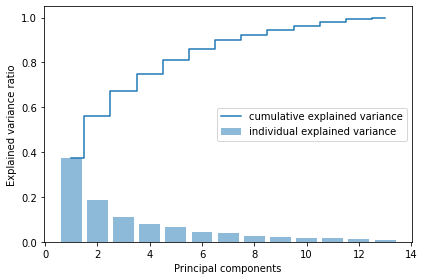

In [52]:
##固有の説明率を出す．
import matplotlib.pyplot as plt


tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

第2主成分までで6割超える

In [53]:
##第1主成分，第2主成分の主成分係数を求める
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


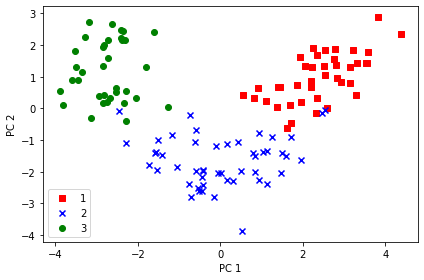

In [55]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()